In [1]:
import os
from utils import plot_stepsizes_and_zetas, extract_params_from_dirname, extract_metrics_from_dir
import concurrent.futures
from tqdm import tqdm
import pandas as pd
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

# Read CSV

In [5]:
sa_sgld = pd.read_csv('tables/sa-sgld_cifar10.csv')
#sgld = pd.read_csv('tables/sgld_cifar10.csv')
#sghmc = pd.read_csv('tables/sghmc_cifar10.csv')
sa_sgula = pd.read_csv("./tables/zbaoabz_cifar10.csv")

In [ ]:
sa_sgld[(sa_sgld["M"] == 2)].head()

,alpha,dtau,Omega,m,M,r,Acc,NLL,ECE,OOD_AUC,Min Mean Max Std Stepsize,Min Mean Max Std Zeta,_step_sizes,_batch_idx,_zetas,_zeta_batch_idx
10,5.0,0.10,0.1,0.02,2.0,0.250,94.68,0.185019,3.668101,65.934683,0.0115 0.0240 0.0460 0.0032,0.0000 0.0008 0.0253 0.0005,"[0.019216394051909447, 0.015705345198512077, 0...","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 0.0019453049171715975, 0.005231318064033...","[-781, -780, -779, -778, -777, -776, -775, -77..."
15,5.0,0.02,1.0,0.02,2.0,0.250,93.23,0.218464,0.412856,66.149257,0.0040 0.0064 0.0101 0.0008,0.0000 0.0002 0.0017 0.0001,"[0.008102774620056152, 0.0072530279867351055, ...","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 4.704819366452284e-05, 8.342084765899926...","[-781, -780, -779, -778, -777, -776, -775, -77..."
17,5.0,0.01,1.0,0.02,2.0,0.250,91.57,0.282691,1.899974,66.493404,0.0021 0.0028 0.0046 0.0003,0.0000 0.0004 0.0012 0.0002,"[0.004596371203660965, 0.004158515017479658, 0...","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 2.4112092432915233e-05, 4.10368847951758...","[-781, -780, -779, -778, -777, -776, -775, -77..."
31,5.0,0.05,0.5,0.02,2.0,0.250,94.35,0.181710,1.620573,66.786883,0.0089 0.0158 0.0299 0.0020,0.0000 0.0002 0.0028 0.0001,"[0.014981972984969616, 0.012779180891811848, 0...","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 0.00021872094657737762, 0.00048099493142...","[-781, -780, -779, -778, -777, -776, -775, -77..."
36,500.0,0.05,0.5,0.02,2.0,0.250,94.85,0.185799,4.672874,66.841429,0.0185 0.0407 0.0834 0.0070,0.0000 0.0000 0.0001 0.0000,"[0.027026785537600517, 0.025361157953739166, 0...","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 9.887627129501197e-06, 1.409898595738923...","[-781, -780, -779, -778, -777, -776, -775, -77..."
39,500.0,0.10,2.0,0.02,2.0,0.250,95.13,0.211096,8.050916,67.583004,0.0576 0.1003 0.1655 0.0096,0.0000 0.0000 0.0000 0.0000,"[0.06838575750589371, 0.06058882176876068, 0.0...","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 2.4719067823752994e-06, 5.12922315465402...","[-781, -780, -779, -778, -777, -776, -775, -77..."
50,50.0,0.10,0.5,0.02,2.0,0.250,94.96,0.205063,6.837400,67.868809,0.0246 0.0567 0.1314 0.0103,0.0000 0.0000 0.0006 0.0000,"[0.035124365240335464, 0.030371539294719696, 0...","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 9.821003914112225e-05, 0.000204448224394...","[-781, -780, -779, -778, -777, -776, -775, -77..."
56,50.0,0.02,1.0,0.02,2.0,0.250,93.90,0.203777,1.804889,66.351148,0.0055 0.0112 0.0226 0.0021,0.0000 0.0000 0.0003 0.0000,"[0.008757200092077255, 0.008413110859692097, 0...","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 3.125191869912669e-05, 3.863161327899434...","[-781, -780, -779, -778, -777, -776, -775, -77..."
64,50.0,0.10,1.0,0.02,2.0,0.500,94.63,0.259499,11.581893,65.103668,0.1334 0.1846 0.1977 0.0039,0.0000 0.0000 0.0001 0.0000,"[0.14862531423568726, 0.1334332674741745, 0.13...","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 4.910668212687597e-05, 0.000102603975392...","[-781, -780, -779, -778, -777, -776, -775, -77..."
73,50.0,0.05,2.0,0.02,2.0,0.250,94.72,0.194877,5.178500,67.350268,0.0160 0.0347 0.0677 0.0057,0.0000 0.0000 0.0002 0.0000,"[0.02324269711971283, 0.021536944434046745, 0....","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 2.2690770492772572e-05, 3.40908482030499...","[-781, -780, -779, -778, -777, -776, -775, -77..."


In [11]:
sa_sgula['_zetas']

0    [0.0002812926541082561, 0.0003581657074391842,...
1    [4.1044118006539065e-06, 3.436559836700326e-06...
2    [4.122126119909808e-05, 3.775028380914591e-05,...
Name: _zetas, dtype: object

In [18]:
def compute_psi(zeta, r, m, M):
    zeta_r = zeta ** r  
    return m * (zeta_r + M/m) / (zeta_r + 1)

compute_psi(0.001945304917171597, 0.25, 0.02, 2) * 0.1


0.16563455703280694

# Evaluations


Matched rows:
      M  alpha  dtau  Omega     r    Acc       NLL        ECE    OOD_AUC
0  2.0    5.0   0.1    1.0  0.25  84.97  0.518253  11.591426  62.505770
1  2.0  500.0   0.1    1.0  0.25  83.93  0.544544  12.001948  62.239171
2  2.0   50.0   0.1    1.0  0.25  84.08  0.533355  11.315684  62.143017
Parsing data...


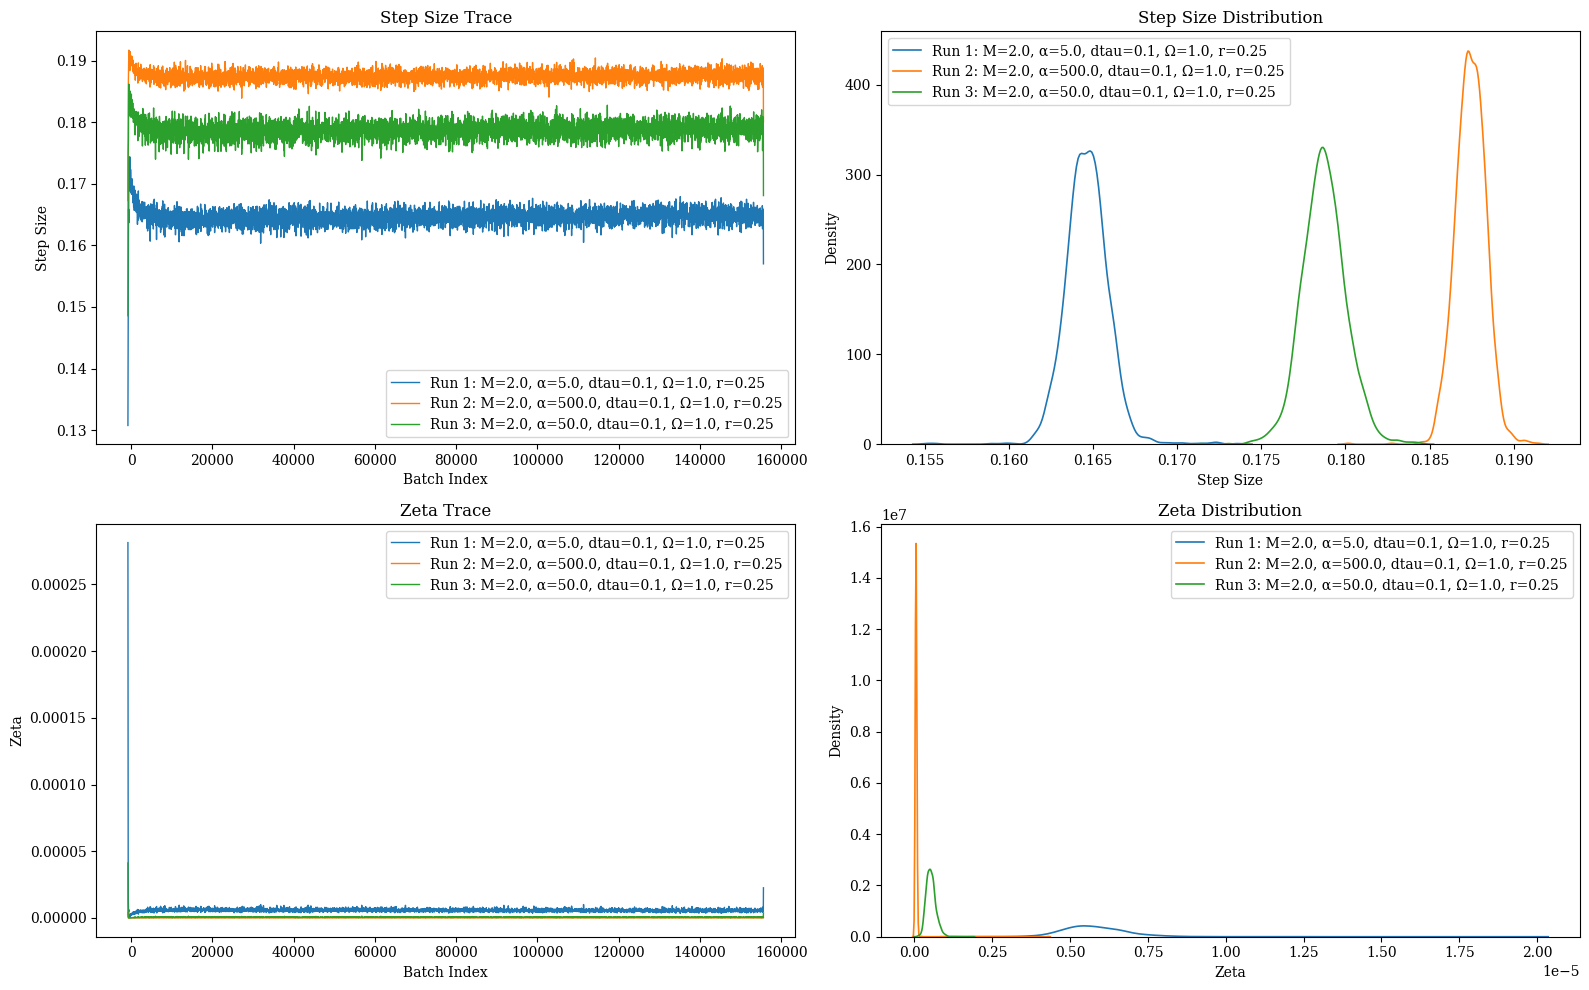

In [8]:
plot_stepsizes_and_zetas(sa_sgula, M=[2.], alpha=[5, 50., 500], dtau=[0.1], omega=[1.], r=[0.25])


Matched rows:
      alpha  dtau  Omega     r    Acc       NLL        ECE    OOD_AUC
33    50.0  0.10    1.0  0.25  94.76  0.215992   7.624795  66.021747
68    50.0  0.02    1.0  0.25  94.73  0.266260  12.135151  66.240604
120   50.0  0.01    1.0  0.25  95.10  0.183959   5.251246  68.529923


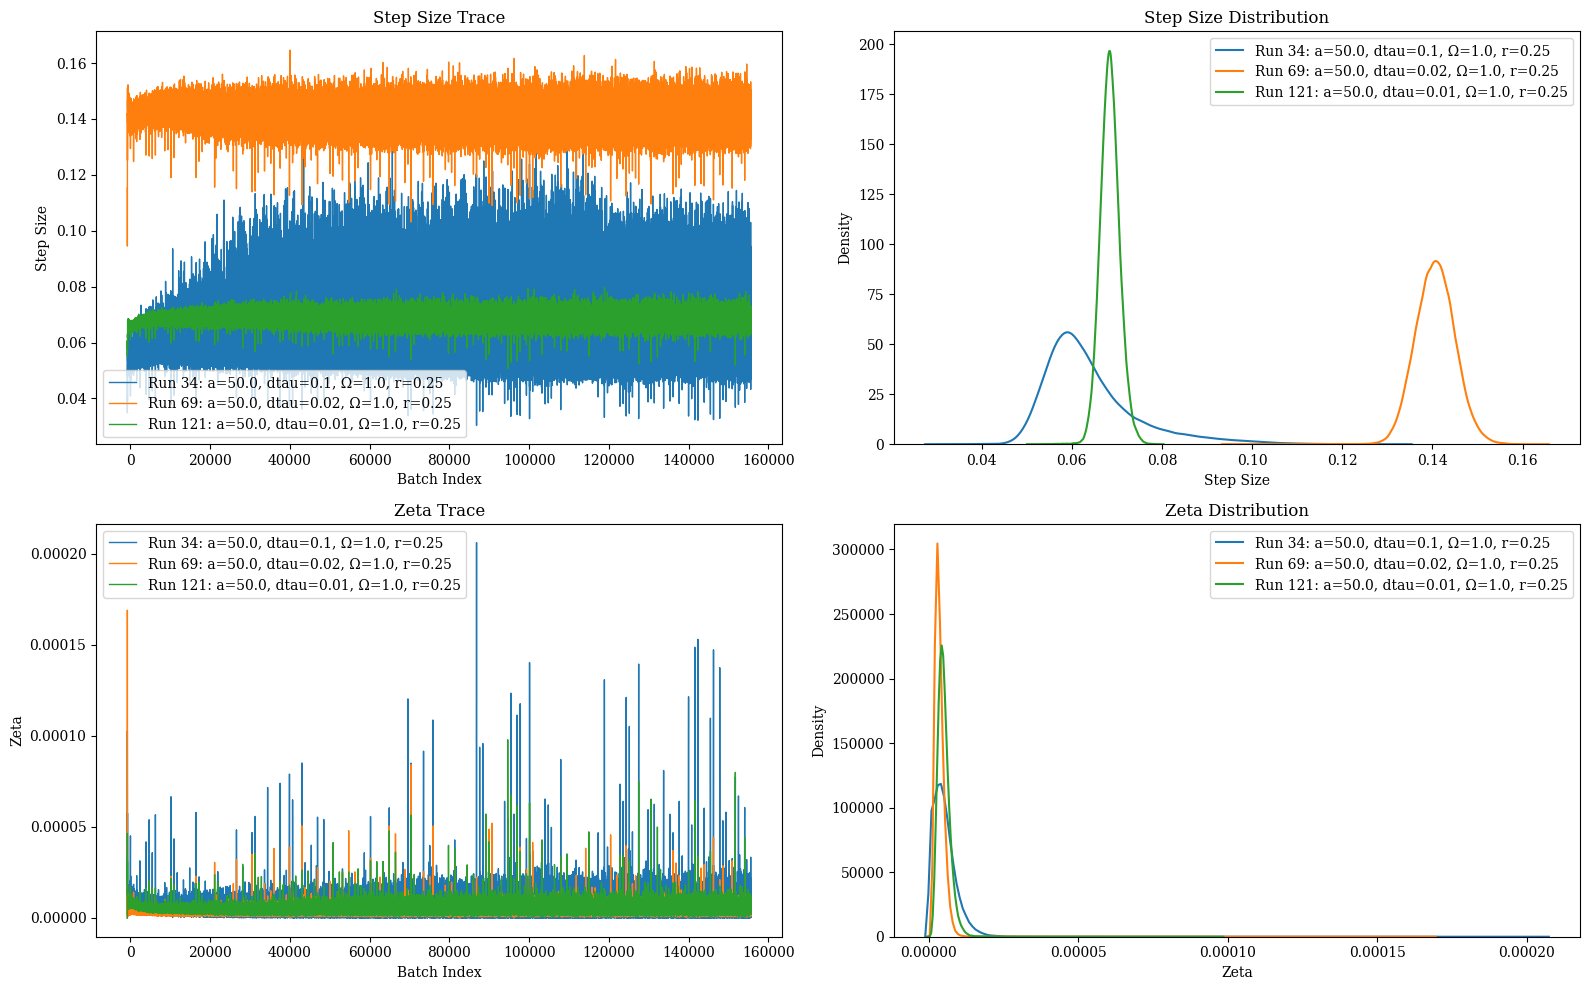

In [4]:
plot_stepsizes_and_zetas(df, alpha=[50.], dtau=[0.01, 0.1, 0.02, 0.005, 0.05], omega=[1.0], r=[0.25])


Matched rows:
      alpha  dtau  Omega     r    Acc       NLL        ECE    OOD_AUC
15    50.0  0.01   0.50  0.25  94.92  0.195000   5.851598  65.944897
28    50.0  0.01   1.25  0.25  95.09  0.208558   7.665120  65.291411
102   50.0  0.01   2.00  0.25  94.94  0.213230   7.645791  68.217288
104   50.0  0.01   0.25  0.25  94.97  0.222087   8.511714  66.879196
116   50.0  0.01   0.75  0.25  94.85  0.241133  10.024625  65.558181
120   50.0  0.01   1.00  0.25  95.10  0.183959   5.251246  68.529923
131   50.0  0.01   1.50  0.25  94.51  0.221802   7.904820  67.185274


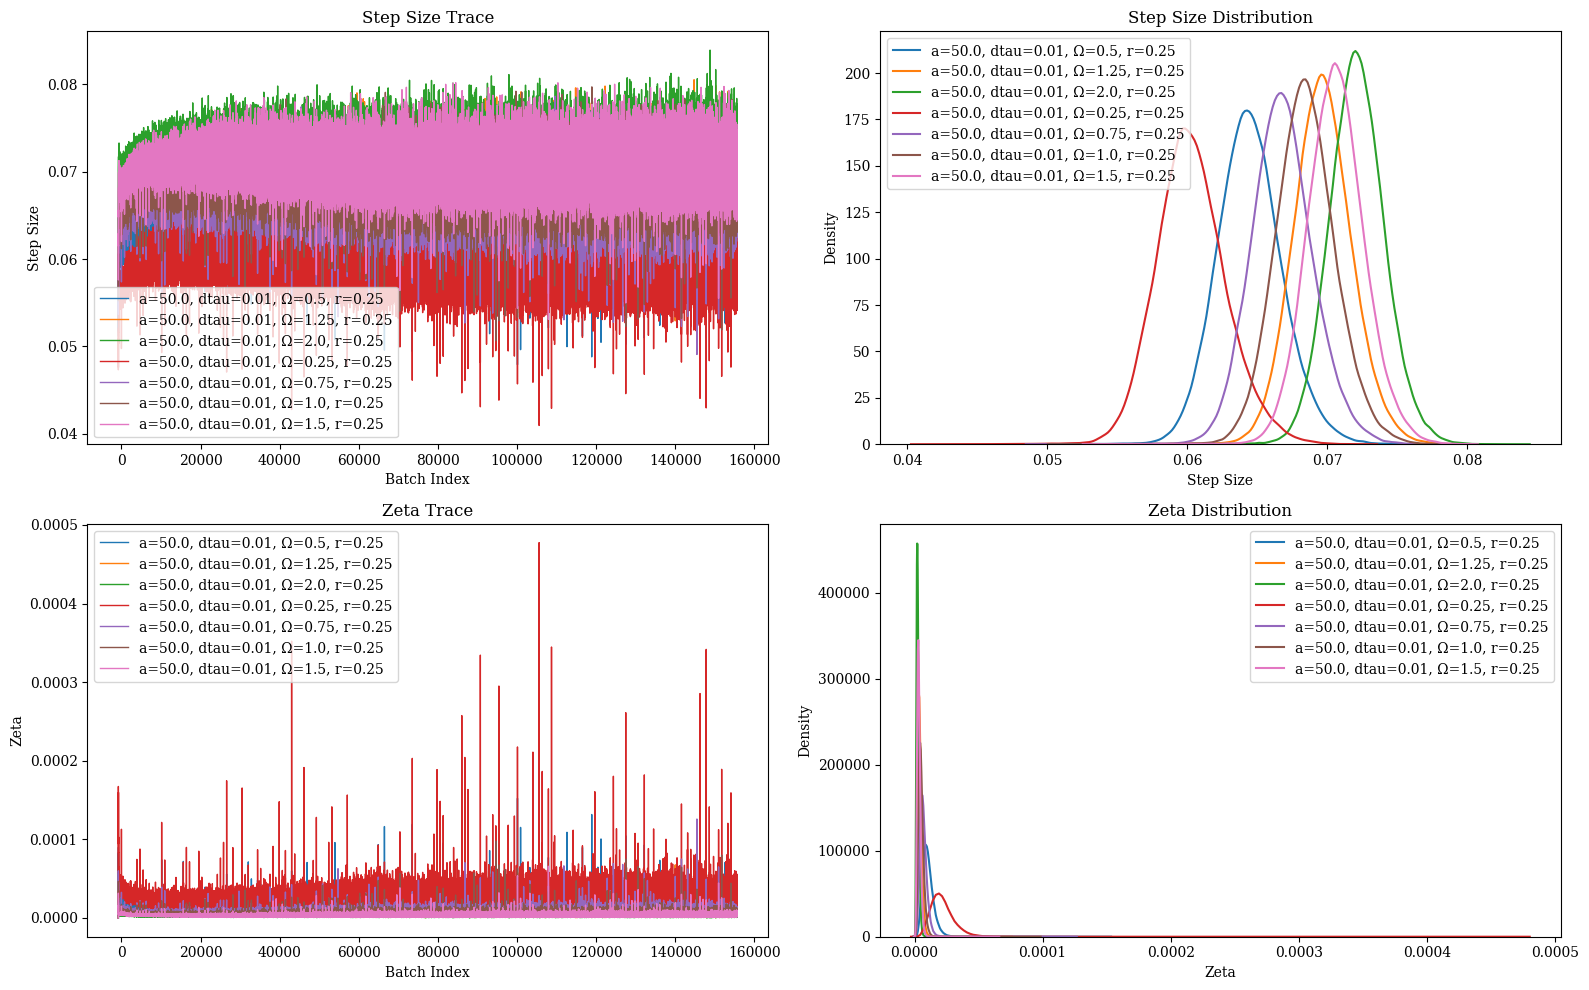

In [3]:
plot_stepsizes_and_zetas(df, alpha=[50.], dtau=[0.01], omega=[0.25, 0.5, 0.75, 1., 1.25, 1.5, 2.], r=[0.25])


Matched rows:
      alpha  dtau  Omega     r    Acc       NLL        ECE    OOD_AUC
3      5.0  0.01    0.1  0.25  94.98  0.169940   3.270286  68.863389
68    50.0  0.02    1.0  0.25  94.73  0.266260  12.135151  66.240604
120   50.0  0.01    1.0  0.25  95.10  0.183959   5.251246  68.529923
134    0.5  0.05    0.5  0.25  94.88  0.303356  15.521152  67.748938


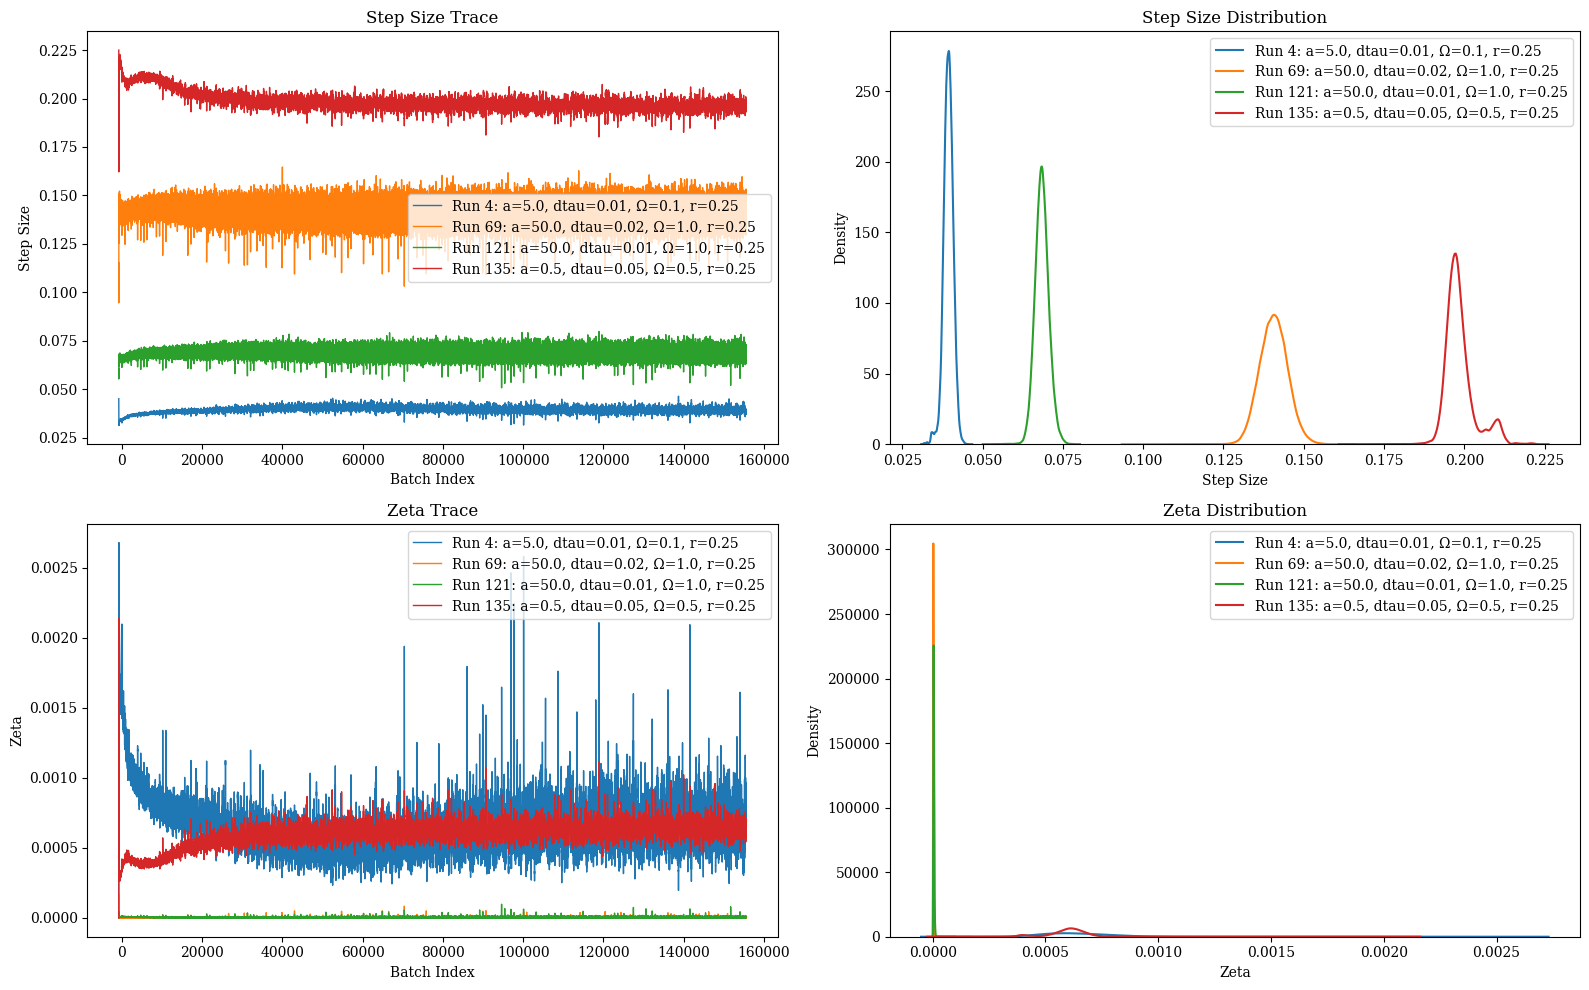

In [6]:
# Ensure relevant columns are numeric
df["alpha"] = df["alpha"].astype(float)
df["dtau"] = df["dtau"].astype(float)
df["Omega"] = df["Omega"].astype(float)

# Define your target rows as a list of conditions
targets = [
    {"alpha": 0.5, "dtau": 0.05, "Omega": 0.5},
    {"alpha": 5, "dtau": 0.01, "Omega": 0.1},
    {"alpha": 50, "dtau": 0.02, "Omega": 1, "r": 0.375},
    {"alpha": 50, "dtau": 0.01, "Omega": 1},
]

# Filter the DataFrame
selected_rows = df[
    df.apply(
        lambda row: any(
            row["alpha"] == t["alpha"] and
            row["dtau"] == t["dtau"] and
            row["Omega"] == t["Omega"] and
            row["r"] == 0.25
            for t in targets
        ),
        axis=1
    )
]

#selected_rows.iloc[:, :-5]#[selected_rows['r'] == 0.25]
# If selected_rows is a DataFrame subset of df
plot_stepsizes_and_zetas(selected_rows, 
                         alpha=selected_rows['alpha'].unique().tolist(), 
                         dtau=selected_rows['dtau'].unique().tolist(), 
                         omega=selected_rows['Omega'].unique().tolist(), 
                         r=selected_rows['r'].unique().tolist())



In [5]:
# Ensure relevant columns are numeric
df["alpha"] = df["alpha"].astype(float)
df["dtau"] = df["dtau"].astype(float)
df["Omega"] = df["Omega"].astype(float)

# Define your target rows as a list of conditions
targets = [
    {"alpha": 0.5, "dtau": 0.05, "Omega": 0.5, "r": 0.25},
    {"alpha": 5, "dtau": 0.01, "Omega": 0.1, "r": 0.25},
    {"alpha": 50, "dtau": 0.02, "Omega": 1, "r": 0.25},
    {"alpha": 50, "dtau": 0.01, "Omega": 1, "r": 0.25},
]

# Filter the DataFrame
selected_rows = df[
    df.apply(
        lambda row: any(
            row["alpha"] == t["alpha"] and
            row["dtau"] == t["dtau"] and
            row["Omega"] == t["Omega"]
            for t in targets
        ),
        axis=1
    )
]

selected_rows

,alpha,dtau,Omega,r,Acc,NLL,ECE,OOD_AUC,Min Mean Max Std Stepsize,Min Mean Max Std Zeta,_step_sizes,_batch_idx,_zetas,_zeta_batch_idx
3,5.0,0.01,0.1,0.250,94.98,0.169940,3.270286,68.863389,0.0312 0.0393 0.0463 0.0015,0.0000 0.0007 0.0027 0.0002,"[0.045076075941324234, 0.03987867757678032, 0....","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 0.0002411209570709616, 0.000571831536944...","[-781, -780, -779, -778, -777, -776, -775, -77..."
8,50.0,0.02,1.0,0.150,95.04,0.205753,7.076047,67.844749,0.0584 0.0792 0.0999 0.0036,0.0000 0.0000 0.0001 0.0000,"[0.0656706690788269, 0.06000746414065361, 0.06...","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 3.125191869912669e-05, 7.658442336833104...","[-781, -780, -779, -778, -777, -776, -775, -77..."
16,50.0,0.02,1.0,0.125,95.14,0.183651,5.335091,68.387137,0.0478 0.0649 0.0840 0.0030,0.0000 0.0000 0.0001 0.0000,"[0.055020786821842194, 0.05078563094139099, 0....","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 3.12519223371055e-05, 7.658614049432799e...","[-781, -780, -779, -778, -777, -776, -775, -77..."
68,50.0,0.02,1.0,0.250,94.73,0.266260,12.135151,66.240604,0.0945 0.1406 0.1646 0.0044,0.0000 0.0000 0.0002 0.0000,"[0.11529266834259033, 0.10430014133453369, 0.1...","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 3.125191869912669e-05, 7.658442336833104...","[-781, -780, -779, -778, -777, -776, -775, -77..."
120,50.0,0.01,1.0,0.250,95.10,0.183959,5.251246,68.529923,0.0506 0.0685 0.0797 0.0022,0.0000 0.0000 0.0001 0.0000,"[0.06049088388681412, 0.056232750415802, 0.056...","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 1.94530475710053e-05, 3.9428527088603005...","[-781, -780, -779, -778, -777, -776, -775, -77..."
134,0.5,0.05,0.5,0.250,94.88,0.303356,15.521152,67.748938,0.1621 0.1986 0.2250 0.0046,0.0000 0.0006 0.0021 0.0001,"[0.22500072419643402, 0.17766889929771423, 0.1...","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 0.0002441346732666716, 0.001214374322444...","[-781, -780, -779, -778, -777, -776, -775, -77..."
137,50.0,0.02,1.0,0.500,94.82,0.175849,3.539667,67.915650,0.0226 0.0357 0.0394 0.0012,0.0000 0.0000 0.0002 0.0000,"[0.03134917840361595, 0.030611207708716393, 0....","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 3.125191869912669e-05, 3.863161327899434...","[-781, -780, -779, -778, -777, -776, -775, -77..."
139,50.0,0.02,1.0,0.375,94.93,0.170659,2.231458,68.272450,0.0118 0.0259 0.0359 0.0026,0.0000 0.0000 0.0003 0.0000,"[0.019982339814305305, 0.019196178764104843, 0...","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 3.125191869912669e-05, 3.863161327899434...","[-781, -780, -779, -778, -777, -776, -775, -77..."


# Extract

In [3]:
def process_directory(dirname):
    dir_path = os.path.join(base_dir, dirname)
    if not os.path.isdir(dir_path):
        return None
    alpha, dtau, omega, r, m, M = extract_params_from_dirname(dirname)
    if alpha is None:
        return None

    metrics = extract_metrics_from_dir(dir_path)
    if metrics is None:
        return None

    (acc, nll, ece, auroc,
     (min_lr, mean_lr, max_lr, std_lr), stepsizes, bidx,
     (min_zeta, mean_zeta, max_zeta, std_zeta), zetas, zeta_bidx) = metrics

    return {
        "alpha": alpha,
        "dtau": dtau,
        "Omega": omega,
        "m": m,
        "M": M,
        "r": r,
        "Acc": acc * 100,
        "NLL": nll,
        "ECE": ece * 100,
        "OOD_AUC": auroc * 100,
        "Min Mean Max Std Stepsize": f"{min_lr:.4f} {mean_lr:.4f} {max_lr:.4f} {std_lr:.4f}",
        "Min Mean Max Std Zeta": f"{min_zeta:.4f} {mean_zeta:.4f} {max_zeta:.4f} {std_zeta:.4f}",
        "_step_sizes": str(list(stepsizes)),
        "_batch_idx": str(list(bidx)),
        "_zetas": str(list(zetas)),
        "_zeta_batch_idx": str(list(zeta_bidx)),
    }

# --- Main script ---

base_dir = "cifar/ckpt_sghmc/sa-sgula/baoab/S1"
all_dirs = os.listdir(base_dir)

results = []
with concurrent.futures.ProcessPoolExecutor() as executor:
    futures = [executor.submit(process_directory, d) for d in all_dirs]
    for f in tqdm(concurrent.futures.as_completed(futures), total=len(futures)):
        res = f.result()
        if res is not None:
            results.append(res)

df = pd.DataFrame(results)
df.to_csv("./tables/zbaoabz_cifar10.csv", index=False)

100%|██████████| 3/3 [00:00<00:00,  3.64it/s]


In [3]:
import os
import json
import numpy as np
import pandas as pd
import concurrent.futures
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
from utils import compute_ece

def extract_number_from_path(dir_path):
    """Extract the number parameter from path like ./ckpt_sgld/sgld/0.2/S1"""
    parts = dir_path.split('/')
    # Find the number between 'sgld' and 'S1'
    try:
        sgld_idx = parts.index('sgula')
        if sgld_idx + 1 < len(parts):
            number_str = parts[sgld_idx + 1]
            return float(number_str)
    except (ValueError, IndexError):
        pass
    return None

def extract_metrics_from_dir(dir_path):
    """Extract metrics from evaluation and training files"""
    eval_path = os.path.join(dir_path, "eval_metrics_16.json")
    train_path = os.path.join(dir_path, "train_metrics.json")
    
    if not os.path.exists(eval_path) or not os.path.exists(train_path):
        return None
    
    # Load evaluation metrics
    with open(eval_path, 'r') as f:
        em = json.load(f)
    
    acc = em.get("accuracy")
    nll = em.get("nll")
    
    # Calculate ECE
    y_true = np.array(em["y"])
    probs = np.array(em["probs"])
    pred = np.argmax(probs, axis=1)
    correct = (y_true == pred)
    prob_correct = probs[np.arange(len(y_true)), pred]
    ece = compute_ece(correct.astype(int), prob_correct)
    
    # Calculate OOD AUROC
    if 'ood' in em:
        oem = em['ood']
    elif 'stl10' in em:
        oem = em['stl10']
    
    try:
        H_ood = np.array(oem["entropy"])
        H_id = np.array(em["entropy"])
        all_entropy = np.concatenate([H_id, H_ood])
        labels_entropy = np.concatenate([np.zeros_like(H_id), np.ones_like(H_ood)])
        auroc_entropy = roc_auc_score(labels_entropy, all_entropy)
    except:
        auroc_entropy = np.nan
    
    return (acc, nll, ece, auroc_entropy)

def process_directory(dir_path):
    """Process a single directory and extract all metrics"""
    if not os.path.isdir(dir_path):
        return None
    
    # Extract number parameter from path
    number = extract_number_from_path(dir_path)
    if number is None:
        return None
    
    # Extract metrics
    metrics = extract_metrics_from_dir(dir_path)
    if metrics is None:
        return None
    
    acc, nll, ece, auroc = metrics
    
    return {
        "number": number,
        "Acc": acc * 100,
        "NLL": nll,
        "ECE": ece * 100,
        "OOD_AUC": auroc * 100,
    }

def find_sgld_directories(base_path):
    """Find all SGLD directories matching the pattern ./ckpt_sghmc/sghmc/**/S1"""
    sgld_dirs = []
    sgld_base = os.path.join(base_path, "ckpt_sghmc", "sgula")
    
    if not os.path.exists(sgld_base):
        print(f"Base directory {sgld_base} does not exist")
        return sgld_dirs
    
    # Look for directories with pattern number/S1
    for item in os.listdir(sgld_base):
        item_path = os.path.join(sgld_base, item)
        if os.path.isdir(item_path):
            s1_path = os.path.join(item_path, "S1")
            if os.path.exists(s1_path) and os.path.isdir(s1_path):
                sgld_dirs.append(s1_path)
    
    return sgld_dirs

# --- Main script ---
base_dir = "./cifar"  # Adjust this to your base directory
sghmc_directories = find_sgld_directories(base_dir)

if not sghmc_directories:
    print("No SGHMC directories found!")
    exit(1)

print(f"Found {len(sghmc_directories)} SGhmc directories")

results = []
with concurrent.futures.ProcessPoolExecutor() as executor:
    futures = [executor.submit(process_directory, d) for d in sghmc_directories]
    for f in tqdm(concurrent.futures.as_completed(futures), total=len(futures)):
        res = f.result()
        if res is not None:
            results.append(res)

if results:
    df = pd.DataFrame(results)
    df = df.sort_values('number')  # Sort by the number parameter
    df.to_csv("./tables/sgula_cifar10.csv", index=False)
    print("\nFirst few rows:")
    print(df.head())
else:
    print("No results found!")

Found 1 SGhmc directories


100%|██████████| 1/1 [00:00<00:00,  9.28it/s]


First few rows:
   number    Acc      NLL       ECE    OOD_AUC
0    0.01  94.91  0.16174  2.760625  68.856896
